In [14]:
import pandas as pd
import xarray as xr
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../grl.mplstyle')

In [32]:
DIR = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'

label = 'C2'
filename = DIR + label + '/energy.dat'
energy = pd.read_csv(filename, delimiter=' ', names=['t','ke','gpe'])
ds = xr.open_dataset(DIR + label + '/series.nc')
dx = ds.attrs['L'] / 2 ** ds.attrs['LEVEL']
ds['ewave'] = (ds['eta']**2).sum(dim=['x','y']) * 9.8 * dx**2

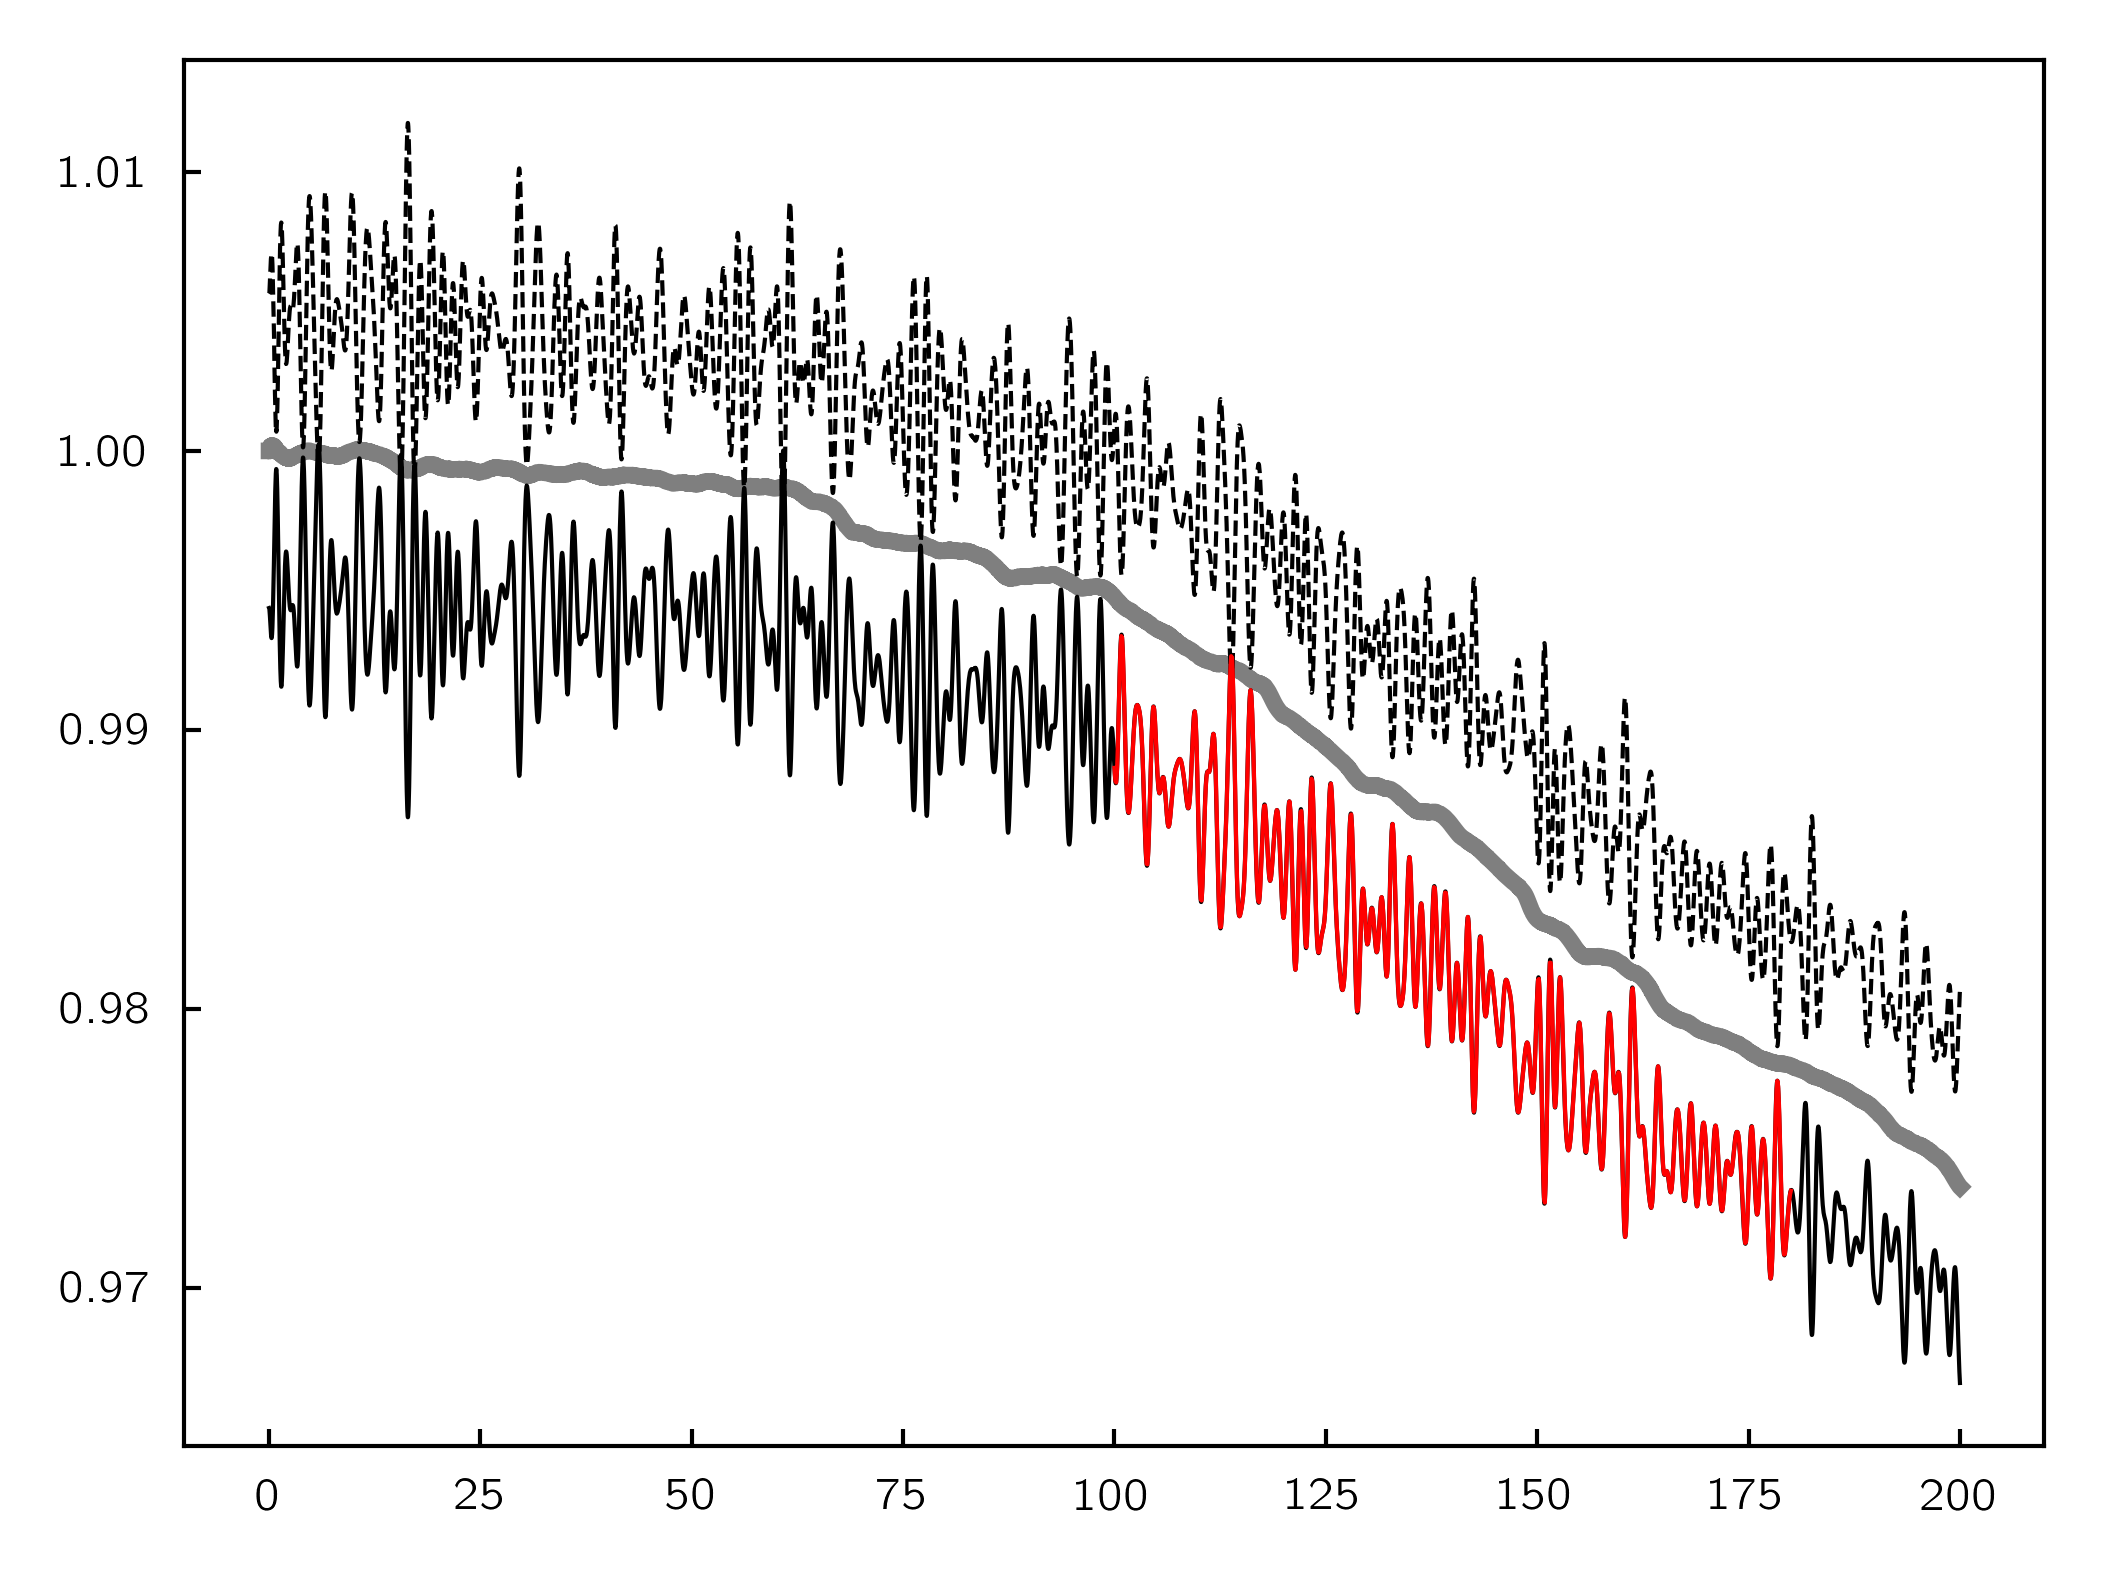

In [33]:
fig = plt.figure(figsize=[4,3]); ax = plt.gca()

window_size = 1
windows = energy.rolling(window_size); moving_averages = windows.mean()    
cc = 'k'
ax.plot(moving_averages.t, 2*moving_averages.ke/(energy.ke[0]+energy.gpe[0]), '--', c=cc)
ax.plot(moving_averages.t, 2*moving_averages.gpe/(energy.ke[0]+energy.gpe[0]), '-', c=cc)
ax.plot(energy.t, (energy.ke+energy.gpe)/(energy.ke[0]+energy.gpe[0]), alpha=0.5, lw=2, c=cc)

ax.plot(ds.t, ds.ewave/(energy.ke[0]+energy.gpe[0]), c='r')

In [ ]:
ds.ewave

In [25]:

ds.eta

<xarray.DataArray 'eta' (t: 801, x: 1024, y: 1024)>
array([[[ 0.057314,  0.06253 , ...,  0.053297,  0.054284],
        [ 0.038745,  0.042094, ...,  0.038509,  0.037609],
        ...,
        [ 0.111833,  0.120109, ...,  0.101044,  0.105496],
        [ 0.081845,  0.088732, ...,  0.074272,  0.077053]],

       [[ 0.113344,  0.121901, ...,  0.10176 ,  0.106656],
        [ 0.085268,  0.092092, ...,  0.077468,  0.080438],
        ...,
        [ 0.183286,  0.19403 , ...,  0.165666,  0.173802],
        [ 0.146383,  0.156308, ...,  0.131433,  0.138088]],

       ...,

       [[-0.065676, -0.069099, ..., -0.060218, -0.062823],
        [-0.072954, -0.074999, ..., -0.070312, -0.071529],
        ...,
        [-0.044534, -0.050801, ..., -0.033505, -0.038726],
        [-0.056131, -0.061075, ..., -0.047582, -0.051669]],

       [[-0.056994, -0.061749, ..., -0.048617, -0.052537],
        [-0.06754 , -0.070754, ..., -0.062539, -0.064817],
        ...,
        [-0.030644, -0.037691, ..., -0.018044, -0.023996],
        [-0.044415, -0.050602, ..., -0.033306, -0.038541]]], dtype=float32)
Coordinates:
  * t        (t) float64 100.0 100.1 100.2 100.3 ... 179.7 179.8 179.9 180.0
  * x        (x) float64 -99.9 -99.71 -99.51 -99.32 ... 99.32 99.51 99.71 99.9
  * y        (y) float64 -99.9 -99.71 -99.51 -99.32 ... 99.32 99.51 99.71 99.9